# Métodos Numéricos - 2

<img src="https://github.com/ccdonoso/Intro2_Computational_Mechanics/blob/master/img/logo_usach_dimec.png?raw=true" alt="logo" width="300"/>

- Autor: Claudio Canales Donoso
- Página: [ccdonoso.github.io](ccdonoso.github.io)
- Cursos: Mecánica Computacional - Diseño Computarizado
- Universidad de Santiago de Chile
- Fecha: 10/05/21

License: BSD 3 clause

**Contenido** : Métodos Númericos - 2.
- Gradientes Descendientes
- Gradientes Conjugados - Sistemas de Ecuaciones Lineales
- Cuadratura Gaussiana
- Newton Raphson Generalizado 



# Gradientes Descendientes

El Descenso de Gradientes [1] es un algoritmo de optimización genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general del Descenso de Gradientes es ajustar los parámetros de forma iterativa para minimizar una función de coste $J$.

$$ \min J(\boldsymbol{\theta}) $$

Supongamos que usted se encuentra perdido en las montañas en medio de una densa niebla, y que sólo puede sentir la pendiente del suelo bajo sus pies. Una buena estrategia para llegar rápidamente al fondo del valle es ir cuesta abajo en la dirección de la pendiente más pronunciada. Esto es exactamente lo que hace el Descenso del Gradiente: mide el gradiente local de la función de error con respecto al vector de parámetros $θ$, y va en la dirección del gradiente descendente. Una vez que el gradiente es cero, ¡se ha alcanzado un mínimo!

Concretamente, se empieza llenando $\boldsymbol{\theta}$ con valores aleatorios (esto se llama inicialización aleatoria). A continuación, se mejora gradualmente, dando un pequeño paso a la vez, cada paso tratando de disminuir la función de coste (por ejemplo, el MSE), hasta que el algoritmo converge hasta que el algoritmo converja a un mínimo .

<img src="img/1_laN3aseisIU3T9QTIlob4Q.gif" alt="GD" width="600"/>

<h2 style="color:blue"> El gradiente siempre esta orientado hacia la dirección de máximo crecimiento </h2>


 
 
**El gradiente de una función siempre esta orientado a la dirección de máximo crecimiento y la dirección opuesta es la dirección de mínimo crecimiento**. En base a esta propiedad del gradiente, se puede utilizar la dirección y magnitud del gradiente para encontrar un máximo o un mínimo. 

El método consiste en los siguientes pasos:

1. Inicialización de un vector de parámetros $\boldsymbol{\theta}_0$
2. Repetir hasta que un criterio de término se cumpla:
    1. $\boldsymbol{\theta}_{n+1} = \boldsymbol{\theta}_n - \alpha \triangledown J(\boldsymbol{\theta}_n), \quad n>0$
    
Donde $\alpha$ pertenece a $\mathbb{R}^{+}$ y tiene que ser lo suficientemente pequeño para que cumpla que $J(\boldsymbol{\theta}_{n+1}) < J(\boldsymbol{\theta}_n)$

En Resumen el método se basa en descender de la cumbre utilizando los gradientes de la función dando pequeños pasos.

 $$ \Large \boldsymbol{\theta}_{n+1} = \boldsymbol{\theta}_n - \alpha \triangledown J(\boldsymbol{\theta}_n), \quad n>0 $$
 
Recordar que este método esta condicionado a la inicialización. 

## Resolver el siguiente problema de optimización

$$\Large \min f(x) = sin(x) \: x^2 \quad \in [0,2\pi]$$ 

In [5]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

# Datos de la Grafica de la función


# Setup Graficos
fig, ax = plt.subplots(figsize=(8,6))
ax.axis([0,8,-30,30])
l, = ax.plot([],[],'rx')
time_text = ax.text(3, 20, '', fontsize=14)
ax.plot(x,y)

# Ingresa el Código aquí
# ---------------------------
#Gradiente Descendiente

#-------------------------------


def animate(i):
    time_text.set_text(r"El valor de $\theta$: {:3f}".format(theta_n[i])+" \nIteración: {}\nFunción objetivo:{:2f}".format(i,J[i]))
    l.set_data(theta_n[:i], J[:i])
    return time_text

    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(J))


ax.legend(["Iteraciones del método","Función a minimizar"])

plt.close()

HTML(ani.to_jshtml())

## Resolver el siguiente problema con gradientes descendientes.

Hacer un código, que sea capaz de resolver el siguiente problema de minimización para cualquier $n$ y con inicialización $\mathbf{0}$.

$$\Large \min_{\mathbf{x} \in \mathbb{R^n}} f(\mathbf{x}) = \frac{1}{2}\sum_i^n (x_i-1)^2 $$ 

Para el caso $n=2$ se tiene que la función es:

<img src="img/parab2d.png" alt="parabolaa" width="350"/>


2.3622585644318948e-05
[0.99998883 0.99999266 0.99999889 ... 0.99998856 0.99997989 0.99997964]


## Solución de Sistemas de ecuaciones Lineales a través de optimización


Un sistema de ecuaciones puede ser escrito como

$$\Large \mathbf{Ax}=\mathbf{b} $$,

donde $\mathbf{A}$ es una matriz $n\times n$, las expresiones $\mathbf{x}$ y $\mathbf{b}$ son matrices de $n\times 1$.

Este problema puede ser escrito de la siguiente manera:

$$ \Large \min_{\mathbf{x} \in \mathbb{R^n}}f(\mathbf{x})=\frac{1}{2}\mathbf{x^T}\mathbf{Ax}-\mathbf{x^T}\mathbf{b}  $$

La existencia de un minimizador esta garantizada si es que $\mathbf{A}$ es una matriz simetrica definida positiva.

$$\Large \triangledown^2 f(\mathbf{x}) = \mathbf{A}  $$



# Método de los Gradientes Conjugados

En matemáticas, el método del gradiente conjugado es un algoritmo para la solución numérica de sistemas de ecuaciones lineales determinados, es decir, aquellos cuya matriz sea positiva-definida. El método del gradiente conjugado suele implementarse como un algoritmo iterativo, aplicable a sistemas dispersos que son demasiado grandes para ser tratados por una implementación directa u otros métodos directos como la descomposición de Cholesky. Los sistemas dispersos de gran tamaño suelen surgir al resolver numéricamente ecuaciones diferenciales parciales o problemas de optimización.

**El método del gradiente conjugado también puede utilizarse para resolver problemas de optimización sin restricciones, como la minimización de la energía.**

El método del **gradiente biconjugado** proporciona una generalización a las matrices no simétricas. Varios métodos de gradiente conjugado no lineal buscan los mínimos de las ecuaciones no lineales y las funciones objetivo de caja negra.

**Para poder utilizar este metodo, la matriz tiene que ser definida positiva**

Para asegurar que una función presenta un mínimo local en $\mathbf{x}$, se tiene que satisfacer que 

$$\large \triangledown f(\mathbf{x}) = \mathbf{0} ; \quad \triangledown^2 f(\mathbf{x}) \rightarrow\textrm{  sea Definido Positivo.}$$

Es fácil comprobar que todas las condiciones se cumplen para un sistema de ecuaciones con una matriz simétrica y definida positiva.

$$ \Large \min_{\mathbf{x} \in \mathbb{R^n}}f(\mathbf{x})=\frac{1}{2}\mathbf{x^T}\mathbf{Ax}-\mathbf{x^T}\mathbf{b}  $$

$$ \Large \triangledown f(\mathbf{x})=\mathbf{Ax-b} = 0 $$

Se observa que al encontrar el valor que minimiza la función, al mismo tiempo se resuelve el sistema de ecuaciones lineales y la condición de optimalidad se verifica con la condición del Hessiano.

$$\Large \triangledown^2 f(\mathbf{x}) = \mathbf{A}  $$

### Este método utiliza los gradientes descendientes para encontrar el óptimo del problema, pero los pasos que da son conjugados de su paso anterior ( Gradientes Conjugados).

Como se puede ver, el gradiente esta definido y el primer vector de la base es $\mathbf{p_0}$ que toma el valor negativo del gradiente en el primer paso $\mathbf{p_0} = \mathbf{b-Ax}$. Los otros vectores de la base serán conjugados de este. Notar que este valor tambien es el residuo del método.

$$\mathbf{r_n}=\mathbf{b-Ax}$$

Como se puede observar de las ecuaciones anteriores, $$\mathbf {r} _{n}$$ es el valor negativo del gradiente de $f$ en $ \mathbf {x} _{k}$, por lo que el método de gradiente descendente requeriría moverse en la dirección $\mathbf{r}_k$. Aquí, sin embargo, insistimos en que las direcciones $ \mathbf {p} _{n} sean conjugados entre sí. Una forma práctica de aplicar esto es exigir que la siguiente dirección de búsqueda se construya a partir del residuo actual y de todas las direcciones de búsqueda anteriores. La restricción de conjugación es una restricción de tipo ortonormal y, por tanto, el algoritmo puede considerarse un ejemplo de ortonormalización de Gram-Schmidt. Esto da la siguiente expresión:

$$\mathbf {p} _{n}=\mathbf {r} _{n}-\sum _{i<n}{\frac {\mathbf {p} _{i}^{\mathsf {T}}\mathbf {A} \mathbf {r} _{n}}{\mathbf {p} _{i}^{\mathsf {T}}\mathbf {A} \mathbf {p} _{i}}}\mathbf {p} _{i}$$

Siguiendo esta dirección, la siguiente ubicación óptima viene dada por:

$$ \mathbf {x} _{n+1}=\mathbf {x} _{n}+\alpha _{n}\mathbf {p} _{n} $$

con

$$ \alpha _{n}={\frac {\mathbf {p} _{n}^{\mathsf {T}}(\mathbf {b} -\mathbf {Ax} _{n})}{\mathbf {p} _{n}^{\mathsf {T}}\mathbf {A} \mathbf {p} _{n}}}={\frac {\mathbf {p} _{n}^{\mathsf {T}}\mathbf {r} _{n}}{\mathbf {p} _{n}^{\mathsf {T}}\mathbf {A} \mathbf {p} _{n}}}$$

## El algoritmo para resolver un sistema de ecuaciones lineales siendo $\mathbf{A}$ definida positiva es:

<img src="img/CG.svg" alt="CG-algorithm" width="500"/>


**Es posible observar que este algoritmo es una versión modificada del método de los gradientes descendientes**

## Cuadratura Gaussiana

En el análisis numérico, una regla de cuadratura es una aproximación de la integral definida de una función, normalmente expresada como una suma ponderada de los valores de la función en puntos específicos dentro del dominio de integración. Una regla de cuadratura gaussiana de n puntos, llamada así en honor a Carl Friedrich Gauss, es una regla de cuadratura construida para obtener un resultado exacto para polinomios de grado $2n - 1$ o menos mediante una elección adecuada de los nodos $x_i$ y los pesos $w_i$ para $i = 1,\dots ,n$. La formulación moderna que utiliza polinomios ortogonales fue desarrollada por Carl Gustav Jacobi en 1826 .El dominio de integración más común para dicha regla se toma como $[-1, 1]$, por lo que la regla se establece como:


$$\int_{-1}^{1}f(x)dx = \sum_i^n w_i f(x_i) $$

Para el problema de integración más simple indicado anteriormente, es decir, $f(x)$ es bien aproximado por polinomios en $[-1,1]$, los polinomios ortogonales asociados son polinomios de Legendre, denotados por $P_n(x)$. Con el n-ésimo polinomio normalizado para dar $P_n(1) = 1$, el i-ésimo nodo de Gauss, $x_i$, es la i-ésima raíz de $P_n$. Estos pesos se pueden calcular como:

$$w_i = \frac{2}{(1-x_i^2)[P'_n(x_i)]^2} $$ 

<img src="img/puntos_pesos_gauss.gif" alt="Cuadratura Gaussina" width="600"/>

A través de  una transformación lineal, es posible cambiar los límites de integración de la siguiente manera:

$$\int_a^{b}f(x)dx =\frac{b-a}{2} \sum_i^n w_i f(\frac{b-a}{2}\chi_i +\frac{b+a}{2}) $$

Calcular la siguiente integral utilizando Cuadratura Gaussiana :
$$  \int_{-2}^{1} x^{3} + x^{5} + sin(x) dx = -15.206$$

In [31]:
def gauss_quadrature3(f,a,b):
    """
    Esta función integra utilizando 3 puntos de cuadratura Gaussiana
    
    Parámetros
    ----------
    f : function
        función a integrar
    a : float
        Límite inferior del intervalo de integración
    b : float
        Límite superior del intervalo de integración
    Retorna
    ----------
    integral : float
        Valor de la approximación de la integral
    """


-15.206934548042273


<h1 style="color:green"> Desafío: Programar la cuadratura Gaussiana para cualquier $n$. </h1>

In [ ]:
def gauss_quadrature(f,a,b,n=3):
    """
    Esta función integra utilizando n puntos de cuadratura Gaussiana
    
    Parámetros
    ----------
    f : function
        función a integrar
    a : float
        Límite inferior del intervalo de integración
    b : float
        Límite superior del intervalo de integración
    n : int
        Cantidad de puntos de la cuadratura Gaussiana
    Retorna
    ----------
    integral : float
        Valor de la approximación de la integral
    """
    
    

## Método de Newton Raphson Generalizado

El método de Newton Raphson puede ser utilizado para solucionar sistemas de ecuaciones no-lineales.


$$\left\{ \begin{array}{l}
f_1(x_1,\cdots,x_N)=f_1({\mathbf x})=0
\\...
... \\
f_N(x_1,\cdots,x_N)=f_N({\mathbf x})=0 \end{array}\right. ,$$

donde

$${\mathbf x}=[x_1,\cdots,x_N]^T . $$

Tambien se puede definir un vector de funciones 
$${\mathbf f}({\mathbf x})=[f_1({\bf x}),\cdots,f_n({\mathbf x})]^T .$$

Por lo tanto el sistema de ecuaciones puede ser escrito como:

$${\mathbf f}({\mathbf x})={\mathbf0} $$


Las series de Taylor nos permiten expresar cada una de las funciones como:

$$\begin{align*}
   f(\mathbf{x}) \approx f(\mathbf{a}) + \triangledown f(\mathbf{a}) (\mathbf{x}-\mathbf{a})
   +  \frac{1}{2} (\mathbf{x}-\mathbf{a})^T \triangledown^2 f(\mathbf{a}) (\mathbf{x}-\mathbf{a}).
\end{align*}$$

Es posible utilizar el termino de primer orden para linealizar la ecuación, es decir hasta el gradiente.

<img src="img/img388.png" alt="NRG_Matriz" width="600"/>

Si se dan cuenta, ahora el sistema de ecuación es un lineal y $\mathbf{f(x)=0}$. Por lo tanto, al linealizar el problema, es posible realizar pequeñas aproximaciones en base a vector de inicialización $\mathbf{x}_0$ y iterar sucesivamente al igual que el método de Newton-Raphson 1D. Por lo tanto, con un vector  $\mathbf{x}_0$ se puede obtener un vector $\mathbf{x}_1=\mathbf{x}_0 + \mathbf{\Delta x_0}$ y ese vector se puede obtener al solucionar el siguiente sistemas de ecuaciones:

El algoritmo básico consiste en repetir estos tres pasos:

1. Resolver el sistema de ecuaciones:

$$ \Large \mathbf{J(x_n) \Delta x_n = f(x_n) } $$

2. Actualizar el vector solución: $$\Large \mathbf{x}_{n+1}=\mathbf{x}_n + \Delta \mathbf{x}_n $$

3. Repetir estos pasos hasta que un criterio de término se cumpla:


[Revisar este documento documento que contiene ejemplos de como utilizar el método](https://www.scribd.com/document/57803567/Algoritmo-de-Newton-raphson-Generalizado)

Resolver el siguiente problema con $\mathbf{x_0}=(0,0)$

$$5x^2 +3xy-2=0 $$

$$x^2+7y^2+3xy-10=0  $$

In [ ]:
# Hacer el código aquí

<h1 style="color:gray"> Problema : encontrar la posición de un avión utilizando tres antenas y el método de Newton Raphson </h1>

Para monitorear la posición de un avión durante el vuelo, este se comunica de forma simultánea con tres antenas, de forma tal que de cada una de ellas obtiene el tiempo que tarda una señal en ir desde el avión a las antenas. Considerando que las señales viajan a $299.792 km/s$, y utilizando el archivo “tiempo_avion.dat”, encuentre la posición instantánea $x,y,z$ del avión, para cada punto de muestreo, utilizando el método de newton Raphson en varias variables.

<img src="img/antenas.png.svg" alt="Antenas" width="900"/>

Se le pide guardar la posición $x,y,z$ del avión en un archivo de texto llamado “posicion.dat”


La posición de las antenas son:
$$A1=(0,500,0)$$
$$A2=(600,0,0)$$
$$A3=(700,300,0)$$
**Consejo, utilice como punto de inicialización $(0,0,0)$ $[km]$**

In [ ]:
# Hacer código aquí

# Solución

NameError: name 'np' is not defined

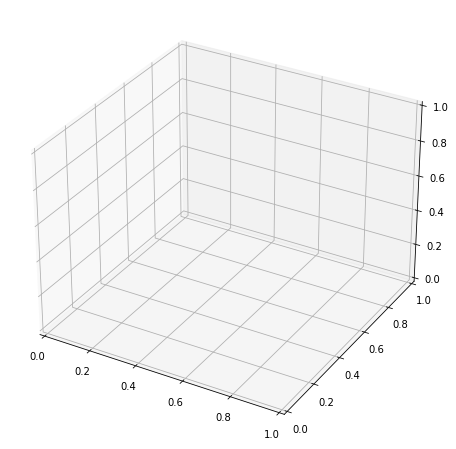

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def animate(frame):
    ax.view_init(30, frame)
    ax.plot3D(xline[:frame], yline[:frame], zline[:frame], color = 'blue')
    return fig

ax.legend(["Trayectoria de avión"])
plt.close()


anim = animation.FuncAnimation(fig, animate, frames=len(zline))
HTML(anim.to_jshtml())